Some Sanity checks for our SVD

In [5]:
import numpy as np
import pandas as pd
import re
import os
import glob
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
from matplotlib.pyplot import ylabel
from matplotlib.font_manager import FontProperties

We get the dir

In [3]:
# the name of our directory
dname = os.path.dirname(os.getcwd()) + "/data_loading/data_v2_quotes/"
dname

'c:\\Users\\Jirko\\Desktop\\Hip_Lab\\analysis_scripts/data_loading/data_v2_quotes/'

Again we get our data 

In [6]:
in_out_matrix = np.load(dname + 'in_out_matrix.npy')
print(in_out_matrix.shape)

in_out_matrix_trialwise = np.load(dname + 'in_out_matrix_trialwise.npy')
print(in_out_matrix_trialwise.shape)

(7, 4, 8)
(7, 4, 128)


SVD ftw

In [7]:
test = in_out_matrix[:,:,0]
u, s, vt = np.linalg.svd(test, full_matrices=False)
s = np.diag(s)

# change the sign of singular vectors for comparability with saxe et al. 2019
# multiplication of an eigenvector with a scalar retains the eigenvector
u[:,[0,2,3]] *= -1
vt[[0,2,3], :] *= -1

print(in_out_matrix[:,:,7].shape)
print(u.shape, s.shape, vt.shape)
print(u)
print(s)

(7, 4)
(7, 4) (4, 4) (4, 4)
[[ 0.5828624  -0.01245376 -0.27454186 -0.0831145 ]
 [ 0.41037259  0.41754875  0.2544069  -0.29995359]
 [ 0.3761055  -0.46897159 -0.16571873  0.01122443]
 [ 0.33010937  0.61607458 -0.25273549  0.08393537]
 [ 0.29786919 -0.06156683  0.84046589  0.33236362]
 [ 0.26753408 -0.42201017  0.07135108 -0.57042159]
 [ 0.28484677 -0.21007772 -0.23893952  0.67830843]]
[[2.35307962 0.         0.         0.        ]
 [0.         0.29412772 0.         0.        ]
 [0.         0.         0.20015521 0.        ]
 [0.         0.         0.         0.11510435]]


Here we perform a little sanity check to assess if U \hat{\Sigma}^{yx} V^T is approximately diagonal

In [19]:
u.shape, s.shape, vt.shape, test.shape

test2 = np.matmul(np.matmul(u.T, test), vt.T)
test2
#plt.matshow( test2, cmap= 'bwr', vmin = -1, vmax = 1)

array([[ 2.35307962e+00, -4.44089210e-16,  0.00000000e+00,
         0.00000000e+00],
       [ 2.08166817e-16,  2.94127721e-01, -3.81639165e-17,
         2.08166817e-17],
       [-1.73472348e-16,  6.24500451e-17,  2.00155214e-01,
         6.93889390e-18],
       [-9.02056208e-17,  6.24500451e-17, -2.08166817e-17,
         1.15104347e-01]])

C:\Users\Jirko\AppData\Local\Temp\ipykernel_5064\2314087172.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,1,2,3,4], fontsize=15)


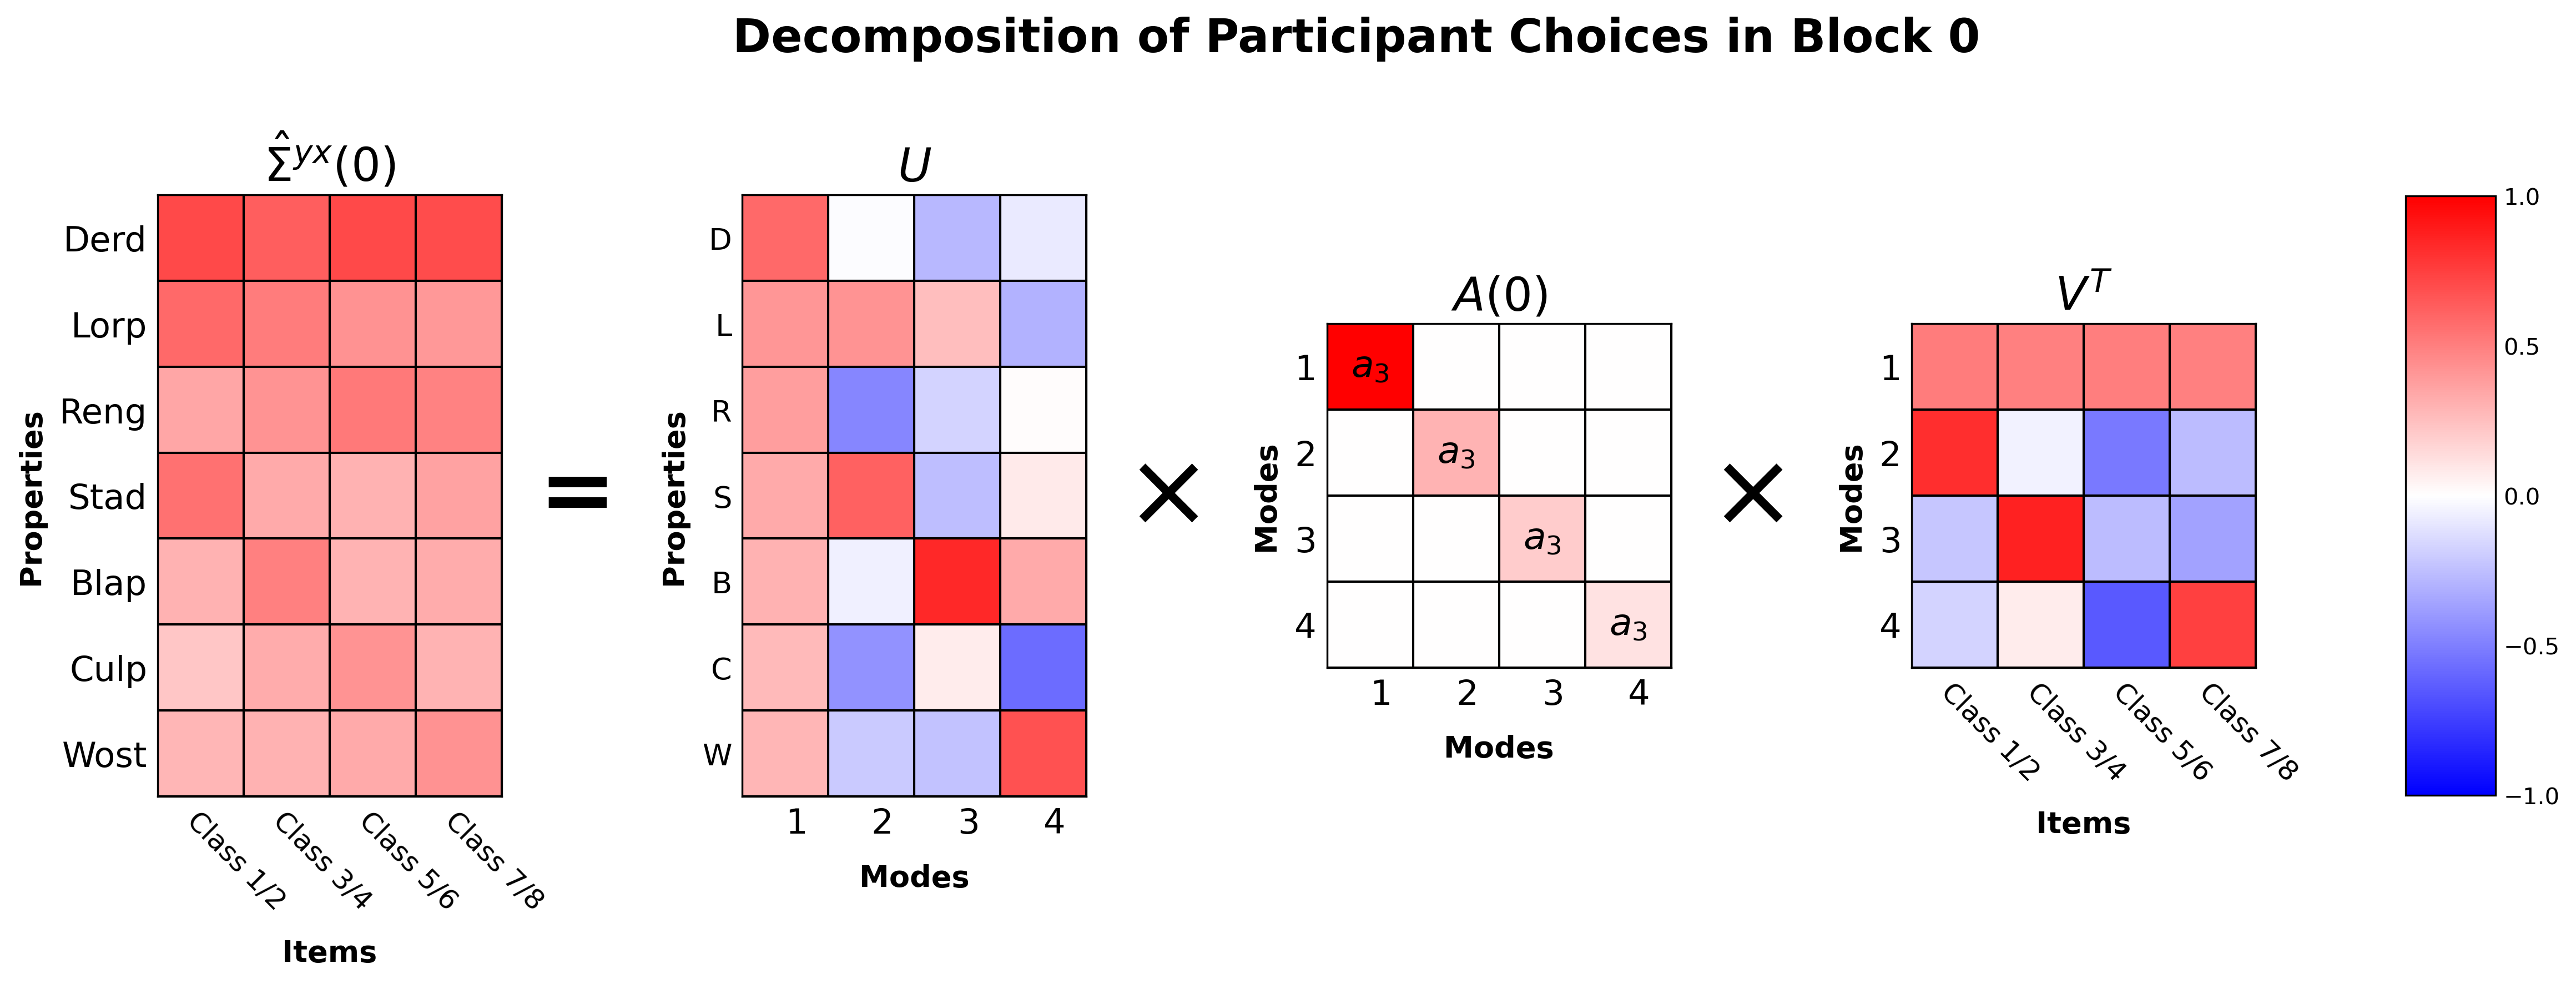

In [8]:
# custom function for the cmap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


def plot_SVD(u, s, vt, in_out_matrix, fig_name, fig_title, Block):
    """ a function to plot the input output matrix"""

    # Define figure
    fig, axes = plt.subplots(1, 4, figsize=(18, 6), dpi=300, facecolor='w')
    cmap = plt.get_cmap('bwr')

    # list of input, singular vectors and singular values for looping
    matrices = [in_out_matrix, u, s, vt]

    # Average per bloc
    for i, ax in enumerate(axes.flatten()):
        im = ax.matshow(matrices[i], cmap=cmap, vmin = -1, vmax = 1)

    # remove the ticks and make tick labels
    y_tick_labels_1 = ['Derd','Lorp','Reng','Stad', 'Blap', 'Culp', 'Wost']
    y_tick_labels_2 = ['D', 'L', 'R', 'S', 'B', 'C', 'W']
    x_tick_labels = ['Class 1/2', 'Class 3/4', 'Class 5/6', 'Class 7/8']

    # the titles 
    titles = ['$\hat{\Sigma}^{yx}(%s)$' % str(Block), '$U$', '$A(%s)$' % str(Block), '$V^{T}$']

    for i, ax in enumerate(axes.flatten()):
        
        sub_title = ax.set_title(titles[i], fontsize = 20)
        ax.tick_params(labeltop=False, labelbottom = True)

        if i in {0, 1}:

            # make grid
            ax.set_xticks(np.arange(-.5, len(x_tick_labels)), minor=True)
            ax.set_yticks(np.arange(-.5, len(y_tick_labels_1)), minor=True)

            # Gridlines based on minor ticks
            ax.grid(which='minor', color='k', linestyle='-', linewidth=1)

            # remove ticks
            ax.tick_params(which='both', left=False, right=False, top=False, bottom=False, pad=1)
            ax.set_xticks(range(len(x_tick_labels)))

            # specific aspects of the two first axes 0 and 1
            if i == 0:
                ax.set_ylabel("Properties",fontweight='bold', fontsize = 13, labelpad=6)
                ax.set_yticks(range(len(y_tick_labels_1)))
                ax.set_yticklabels(y_tick_labels_1, fontsize=15)
                ax.set_xticklabels(x_tick_labels, rotation= -45, fontsize=12, ha="left", rotation_mode="anchor")

                # y label is set
                ax.set_xlabel("Items",fontweight='bold', fontsize = 13, labelpad=10)

            if i == 1:
                ax.set_ylabel("Properties",fontweight='bold', fontsize = 13, labelpad=6)
                ax.set_yticks(range(len(y_tick_labels_2)))
                ax.set_yticklabels(y_tick_labels_2, fontsize=13)
                ax.set_xticklabels([1,2,3,4], fontsize=15, ha="left", rotation_mode="anchor")
                # y label is set
                ax.set_xlabel("Modes",fontweight='bold', fontsize = 13, labelpad=10)


        if i in {2, 3}:
            # make grid
            ax.set_xticks(np.arange(-.5, len(x_tick_labels)), minor=True)
            ax.set_yticks(np.arange(-.5, len(x_tick_labels)), minor=True)
            # Gridlines based on minor ticks
            ax.grid(which='minor', color='k', linestyle='-', linewidth=1)

            # remove ticks
            ax.tick_params(which='both', left=False, right=False, top=False, bottom=False, pad=1)
            # set x and y and remove add tick labels
            ax.set_xticks(range(len(x_tick_labels)))
            ax.set_xticklabels([1,2,3,4], fontsize=15, ha="left", rotation_mode="anchor")
            ax.set_yticklabels([0,1,2,3,4], fontsize=15)

            # set the y label
            ax.set_ylabel("Modes",fontweight='bold', fontsize = 13, labelpad=6)

            # specific aspects of the two first axes 2 and 3
            if i == 2:
                # set the x label 
                ax.set_xlabel("Modes",fontweight='bold', fontsize = 13, labelpad=10)

                # a little loop which draws the labels of our singular values in our cells <3
                for j in range(4):
                    ax.text(j, j, '$a_%s$' % str(i+1), va='center', ha='center', fontsize = 16)

            if i == 3:
                ax.set_xlabel("Items",fontweight='bold', fontsize = 13, labelpad=10)
                ax.set_xticklabels(x_tick_labels, rotation= -45, fontsize=12, ha="left", rotation_mode="anchor")


    # add a supertitle
    fig.suptitle(fig_title, fontweight='bold', fontsize = 20)

    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.7, 
                        hspace=0.4)

    # add a colourbar
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.2, 0.03, 0.6])
    cbar = fig.colorbar(im, cax=cbar_ax, ticks = [-1,-.5, 0, .5, 1])
    cbar.ax.tick_params(size=0)

    # add equal sign
    fig.text(0.24, 0.5, '=', fontsize=40, fontweight='bold', ha='center', va='center')
    fig.text(0.435, 0.5, r'$\times$', fontsize=45, fontweight='bold', ha='center', va='center')
    fig.text(0.63, 0.5, r'$\times$', fontsize=45, fontweight='bold', ha='center', va='center')

    # fig.savefig(fig_name)

# print(os.getcwd())
plot_SVD(u, s, vt, test, 
                  'figures/SVD_block_0.svg', 
                  "Decomposition of Participant Choices in Block 0",
                  0
                )